**<span style="color:orange; font-size:60px">SMHRD Team B.O.A<br>Machine Learning Project</span>**

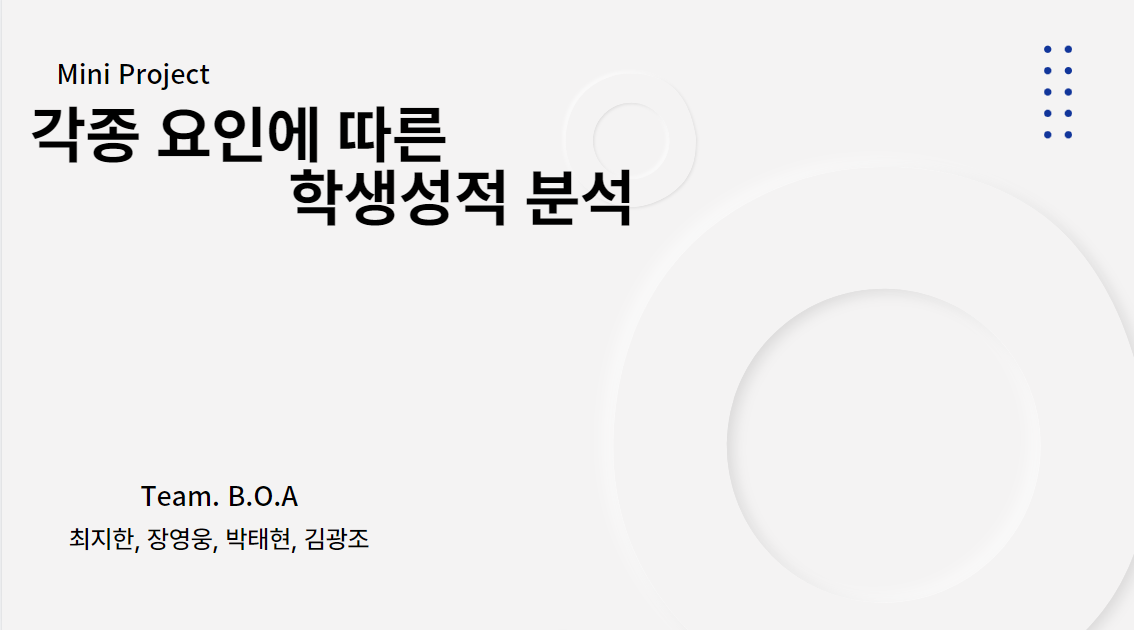

# 1. 목표 & 문제정의 
- 각종 요인에 따른 학생의 성적을 예상 후 개선방안 탐색
- 지도학습의 회귀모델을 이용한 인공지능 학습

# 2. 데이터 수집
- 캐글 사이트를 이용한 데이터 수집
- 6607개의 다양한 학생 데이터 활용

## Data Fields 설명

<table style="margin-left: 0;">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Hours_Studied</strong></td>
      <td>학생이 공부한 총 시간 (일반적으로 일주일 또는 시험 준비 기간 동안의 시간)</td>
    </tr>
    <tr>
      <td><strong>Attendance</strong></td>
      <td>학교 출석률 (전체 수업에 대한 출석 비율)</td>
    </tr>
    <tr>
      <td><strong>Parental_Involvement</strong></td>
      <td>부모의 교육 참여도 (자녀의 학업에 부모가 얼마나 관여하는지)</td>
    </tr>
    <tr>
      <td><strong>Access_to_Resources</strong></td>
      <td>학습 자료에 대한 접근성 (교재, 인터넷, 도서관 등 학습에 필요한 자원)</td>
    </tr>
    <tr>
      <td><strong>Extracurricular_Activities</strong></td>
      <td>학생의 교과 외 활동 참여 (스포츠, 예술, 클럽 등 학업 외 활동)</td>
    </tr>
    <tr>
      <td><strong>Sleep_Hours</strong></td>
      <td>학생의 수면 시간 (일일 평균 수면 시간)</td>
    </tr>
    <tr>
      <td><strong>Previous_Scores</strong></td>
      <td>이전 시험의 점수 (학생의 과거 시험 성적)</td>
    </tr>
    <tr>
      <td><strong>Motivation_Level</strong></td>
      <td>학습에 대한 학생의 동기 수준 (내재적 또는 외재적 학습 동기)</td>
    </tr>
    <tr>
      <td><strong>Internet_Access</strong></td>
      <td>인터넷 접속 가능 여부 (학생이 인터넷에 얼마나 자주, 안정적으로 접근할 수 있는지)</td>
    </tr>
    <tr>
      <td><strong>Tutoring_Sessions</strong></td>
      <td>과외 또는 보충 수업 횟수 (학생이 과외나 추가 학습을 위해 받은 수업 수)</td>
    </tr>
    <tr>
      <td><strong>Family_Income</strong></td>
      <td>가정의 소득 수준 (가족의 경제적 상태를 나타내는 변수)</td>
    </tr>
    <tr>
      <td><strong>Teacher_Quality</strong></td>
      <td>교사의 질적 수준 (교사의 학습 지도 능력과 교육 효과를 평가)</td>
    </tr>
    <tr>
      <td><strong>School_Type</strong></td>
      <td>학교 유형 (공립, 사립 등 학생이 다니는 학교의 분류)</td>
    </tr>
    <tr>
      <td><strong>Peer_Influence</strong></td>
      <td>또래의 영향력 (학생의 학습, 생활에 친구들이 미치는 긍정적 또는 부정적 영향)</td>
    </tr>
    <tr>
      <td><strong>Physical_Activity</strong></td>
      <td>신체 활동 수준 (운동이나 스포츠 활동의 참여도)</td>
    </tr>
    <tr>
      <td><strong>Learning_Disabilities</strong></td>
      <td>학습 장애 여부 (학생이 학습에 어려움을 겪는 장애가 있는지 여부)</td>
    </tr>
    <tr>
      <td><strong>Parental_Education_Level</strong></td>
      <td>부모의 교육 수준 (부모가 받은 최종 학력 수준)</td>
    </tr>
    <tr>
      <td><strong>Distance_from_Home</strong></td>
      <td>집에서 학교까지의 거리 (학생이 집에서 학교까지 가는 거리 또는 소요 시간)</td>
    </tr>
    <tr>
      <td><strong>Gender</strong></td>
      <td>학생의 성별 (남성, 여성 또는 기타 성별)</td>
    </tr>
    <tr>
      <td><strong>Exam_Score</strong></td>
      <td>시험 성적 (학생이 이번 시험에서 받은 점수, 예측해야 할 목표)</td>
    </tr>
  </tbody>
</table>


### XGBoost 및 LightGBM 설치

In [6]:
!pip install xgboost
!pip install lightgbm

### 필요한 라이브러리 임포트

In [8]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
data = pd.read_csv('./data/StudentPerformanceFactors.csv')

# 3. 데이터 전처리
- 데이터 확인
- 결측치, 이상치 제거 데이터 필터링
- 원-핫 인코딩을 이용하여 데이터 글자형 데이터 -> 숫자형 데이터 변경

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [12]:
print(data.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [13]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## 결측값 제거
- 결측값 제거 후 확인

In [15]:
data_na = data.dropna()
data_na.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## 데이터 필터링 및 통계 요약
- 시험 점수가 0에서 100 사이의 유효한 점수인 데이터만 남기고 나머지는 제거
- 수치형 열에 대한 기본적인 통계 요약

In [17]:
data_clean = data_na[data_na['Exam_Score'] <= 100]
data_clean.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


## 범주형 변수 선택, 원-핫 인코딩
- 데이터프레임에서 범주형 변수를 선택 후 숫자형 데이터로 변환 과정

In [19]:
categorical_columns = data_clean.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [20]:
categorical_columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

### 인코딩 후 데이터 확인

In [22]:
data_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


# 4. 탐색적 데이터 분석
- 상관 관계 그래프로 시각화
- 숫자 데이터를 이용하여 통계적 분석

### 그래프에 사용하기 위한 한글 폰트 불러오기

In [25]:
font_path = './data/malgunsl.ttf'
from matplotlib import font_manager, rc
font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = 'Malgun Gothic')

## 시각화

### 컬럼간의 상관관계를 히트맵으로 표시

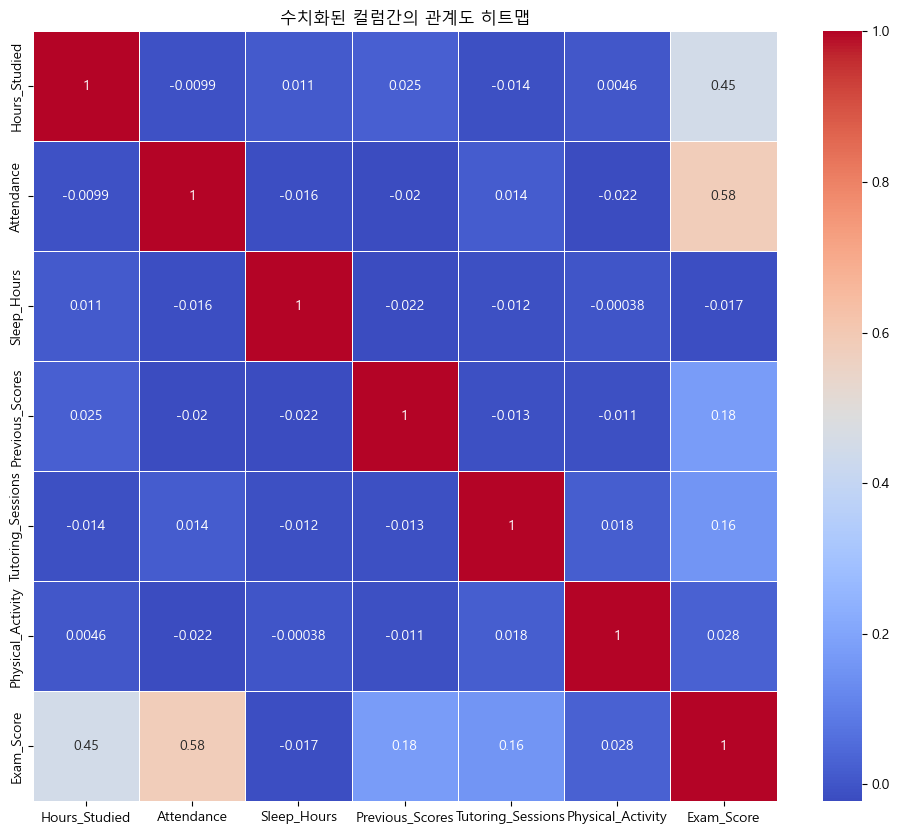

In [28]:
numeric_data = data_encoded.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('수치화된 컬럼간의 관계도 히트맵')
plt.show()

- 수 많은 컬럼 중 정답 데이터인 'Exam_Score'와 연관성이 높은 컬럼은 'Hours_Studied', 'Attendance'이다.

### 점수대 별 분포되어 있는 학생들의 수를 나타낸 그래프

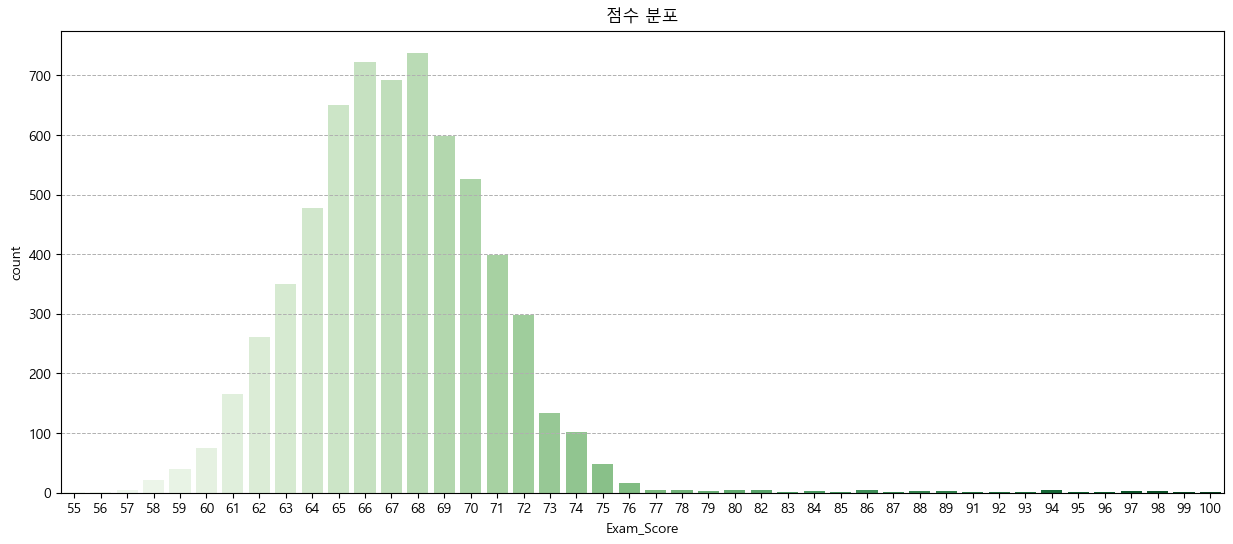

In [31]:
# 점수 분포
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 6))
sns.countplot(x = data_clean['Exam_Score'], palette='Greens')
plt.title("점수 분포")
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

- 전체적으로 봤을때 거의 대부분의 학생들은 중간정도의 점수대에 포진되어있다.

### 정답 데이터와 문제 데이터간의 상관관계를 나타낸 그래프

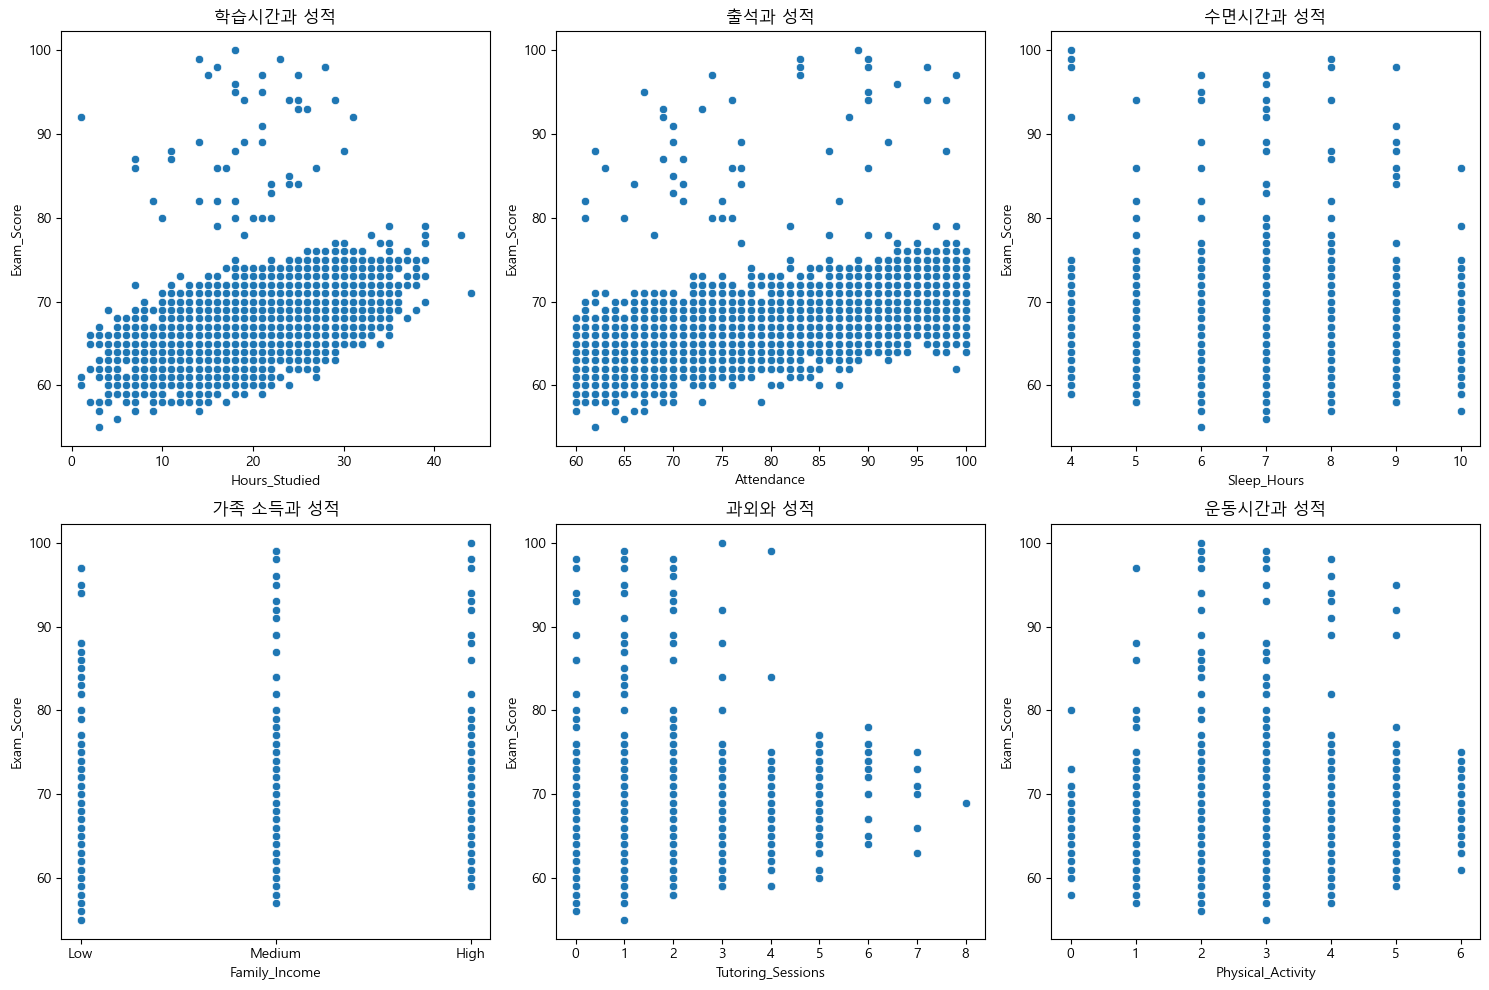

In [34]:
# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 학습시간과 성적
plt.subplot(2, 3, 1)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data_clean )
plt.title('학습시간과 성적')

# 출석과 성적
plt.subplot(2, 3, 2)
sns.scatterplot(x='Attendance', y='Exam_Score', data=data_clean )
plt.title('출석과 성적')

# 수면시간과 성적
plt.subplot(2, 3, 3)
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data_clean )
plt.title('수면시간과 성적')

#가족 소득과 성적
plt.subplot(2, 3, 4)
sns.scatterplot(x='Family_Income', y='Exam_Score', data=data_clean )
plt.title('가족 소득과 성적')

# 과외와 성적
plt.subplot(2, 3, 5)
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=data_clean )
plt.title('과외와 성적')

# 운동시간과 성적
plt.subplot(2, 3, 6)
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=data_clean )
plt.title('운동시간과 성적')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

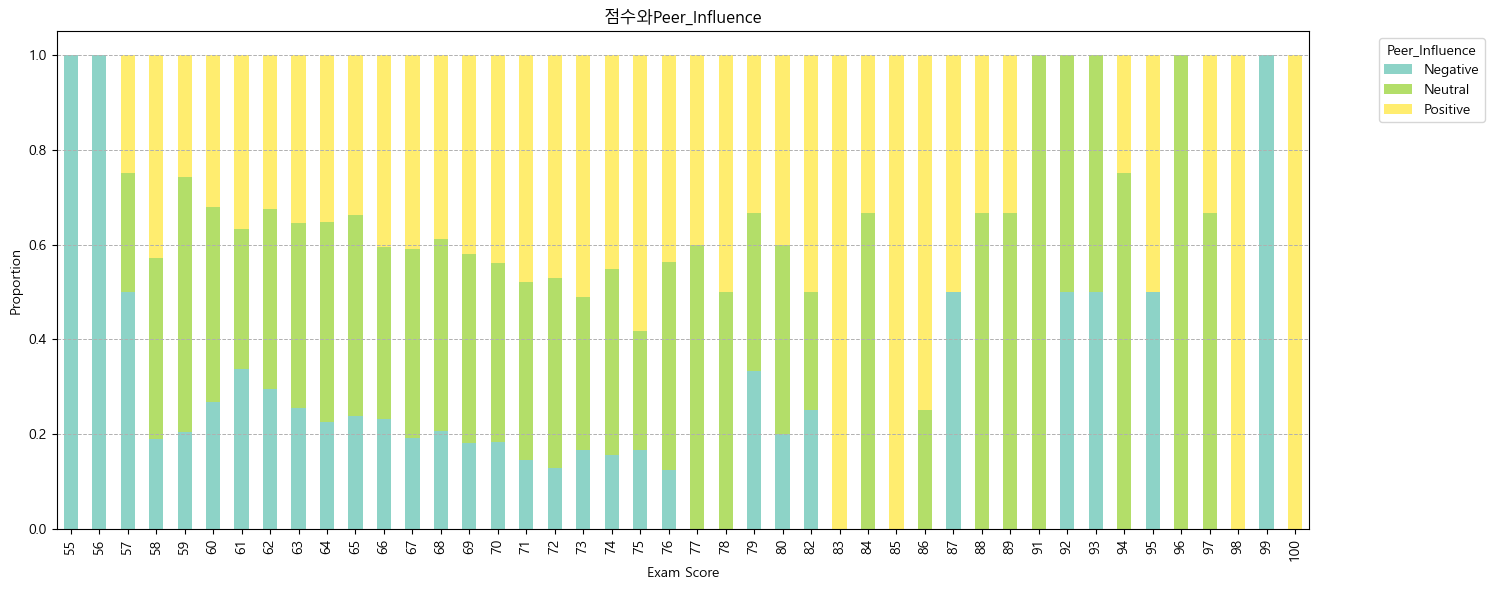

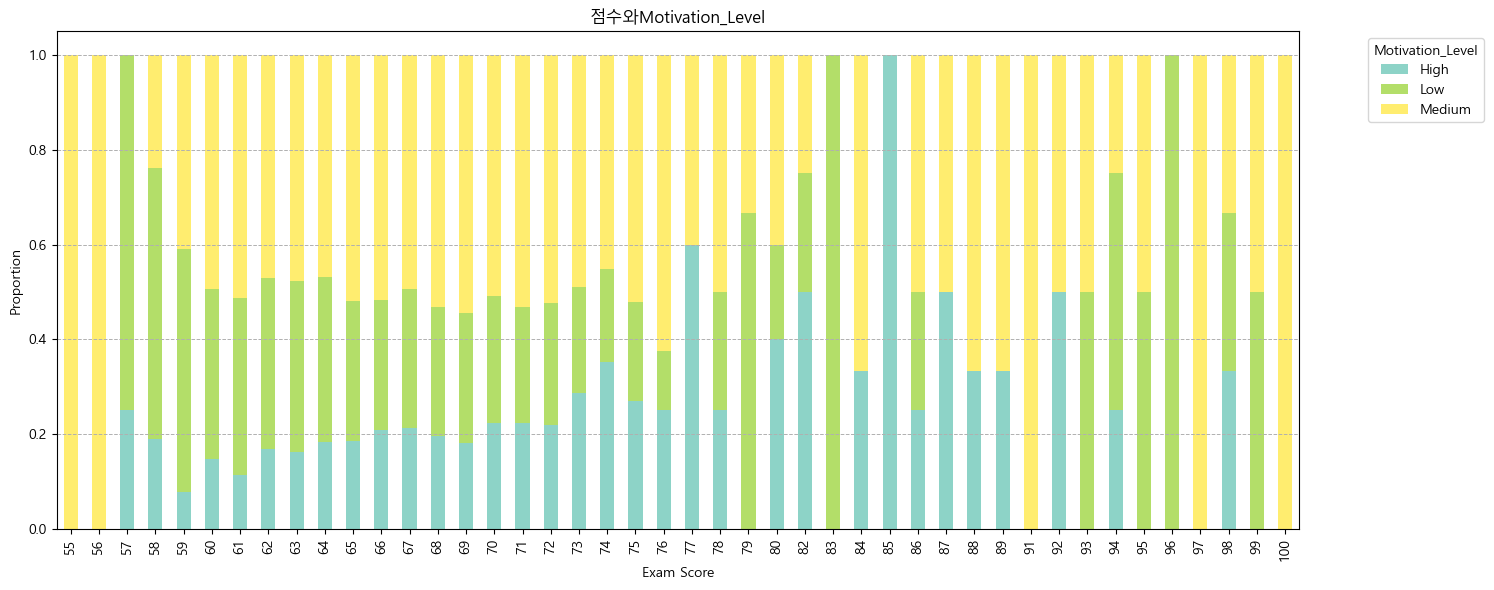

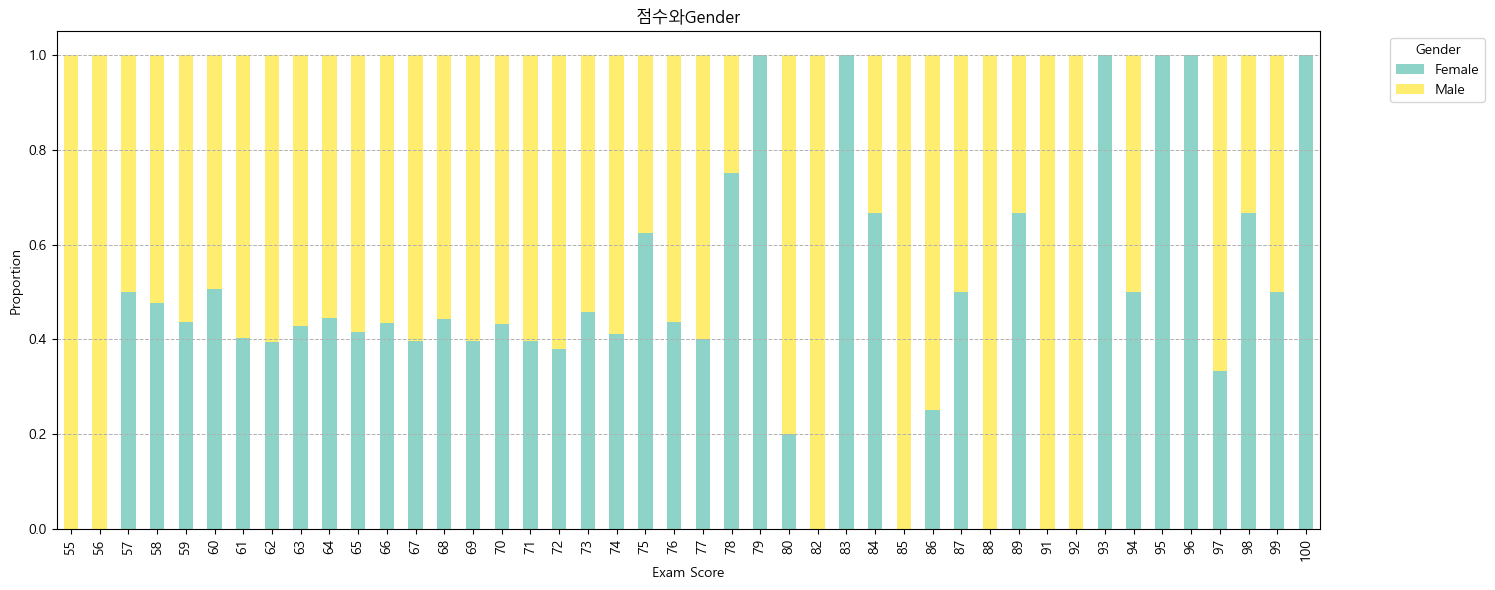

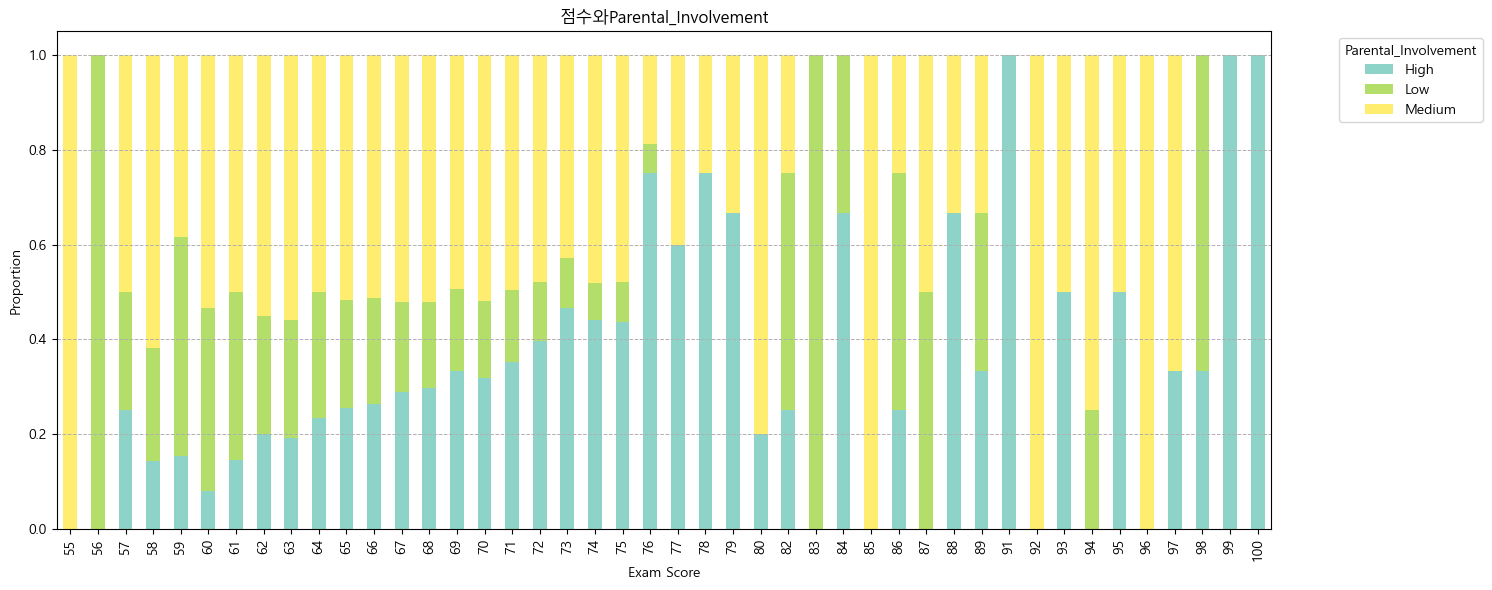

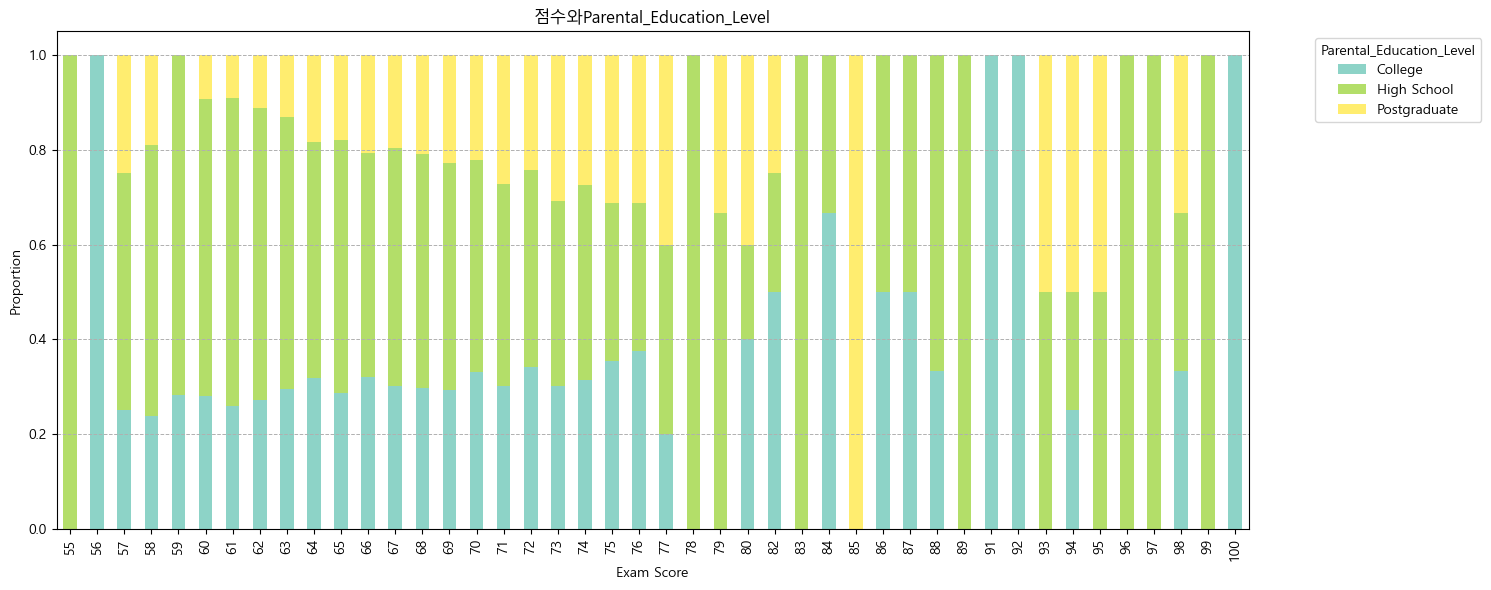

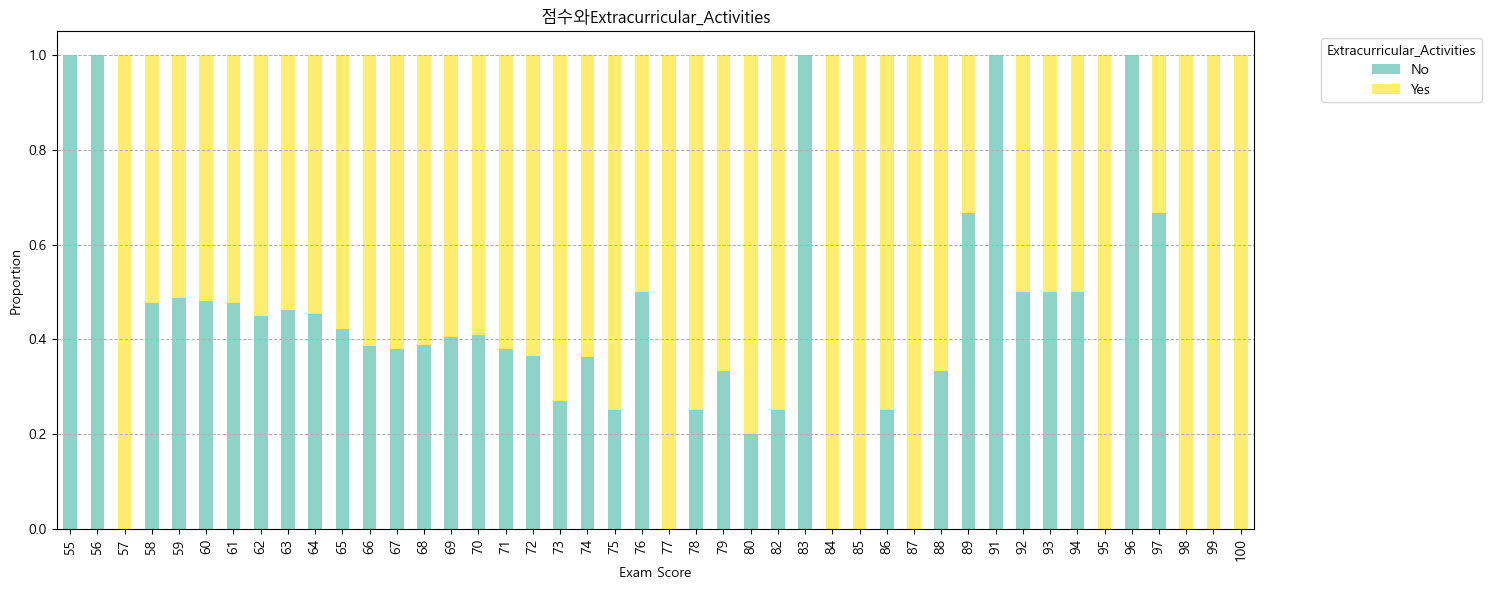

In [35]:
# 문자형 데이터와 점수의 관계
data_for_graph = data_na[data_na['Exam_Score'] <= 100]
for col in ['Peer_Influence', 'Motivation_Level', 'Gender', 
            'Parental_Involvement', 'Parental_Education_Level', 'Extracurricular_Activities']:
    
    # 첫 번째 인자로 'exam_score' 열을 선택
    crosstab_data = pd.crosstab(data_for_graph['Exam_Score'], data_for_graph[col], normalize='index')
    
    ax = crosstab_data.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='Set3')
    
    plt.title(f"점수와{col}")
    plt.xlabel('Exam Score')
    plt.ylabel('Proportion')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

    plt.tight_layout()
    plt.show()

- 학습 시간이 늘어 날 수록 평균 성적은 증가하지만 너무 과했을 경우 오히려 감소한다.
- 출석률이 높을수록 전반적으로 성적의 평균이 증가한다.
- 평균 수면시간에서 벗어날 경우 성적이 감소한다.
- 저소득층은 중~고 소득층에 비해 최저점과 최고점 모두 차이가 난다.
- 과외시간이 늘어 날 수록 성적이 점점 감소한다.
- 너무 적거나 지나친 운동은 되려 성적에 악영향을 끼친다.

### X(학습데이터),y(정답데이터) 특성 및 변수 정의
- 머신러닝 모델을 학습시키기 위해 특성과 레이블을 정의

In [38]:
X = data_encoded.drop(columns=['Exam_Score'])
y = data_encoded['Exam_Score']

# 5. 모델 선택, 모델 세부 조정
- 모델 선택
- 하이퍼 파라미터 튜닝
- 교차 검증

### 모델 선택
- 회귀 문제를 해결하기 위해 사용되는 모델
- 선형 및 비선형 문제에 범용성이 좋은 모델들을 선정
- 데이터 복잡성을 고려해 선형, 비선형 두가지 모두 사용가능한 모델을 선택(Linear모델 제외)
- RandomForestRegressor : 예측 성능을 향상시키는 앙상블 학습 방법  

- GradientBoostingRegressor : 결정 트리를 순차적 학습, 모델의 성능 향상
- XGBRegressor : 빠르고 효율적인 모델, 대량의 데이터와 자원이 제한된 환경에서 높은 성능을 발휘
- LinearRegression : 선형 관계를 가정한 회귀 모델, 간단하고 해석이 용이함
- LGBMRegressor : 빠르고 메모리 효율성이 좋은 모델, 대량의 데이터와 고차원 피처 문제에 효과적

In [41]:
# 활용을 위해 모델을 models라는 딕셔너리에 저장
models = {
    'RandomForestRegressor' : RandomForestRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor(eval_metric='rmse', use_label_encoder=False),
    'LinearRegression' : LinearRegression(),
    'LGBMRegressor' : LGBMRegressor()
}

In [42]:
# 지정하는 model을 반환하는 함수
def get_model(name):
    for model_name, model in models.items():
        if model_name == name:
            return model

### 하이퍼파라미터 튜닝
- 모델의 성능을 조정하고 성능을 최적화 하는 과정
- 교차검증을 위한 하이퍼 파라미터 범위 지정

In [44]:
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
xb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
lr_param = {
    'fit_intercept': [True, False]
}
lg_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 40, 50],
    'verbosity': [0]
}

### GridSearchCV를 통한 교차 검증

In [46]:
def get_Grid(model_name, param, cv):
    model = get_model(model_name)
    grid = GridSearchCV(model, param, cv=cv)
    return grid

In [47]:
# 활용을 위해 grids 딕셔너리에 저장
grids = {
    'RandomForestRegressor' : get_Grid('RandomForestRegressor',rf_param,5),
    'GradientBoostingRegressor' : get_Grid('GradientBoostingRegressor',gb_param,5),
    'XGBRegressor' : get_Grid('XGBRegressor', xb_param, 5),
    'LinearRegression' : get_Grid('LinearRegression', lr_param, 5),
    'LGBMRegressor' : get_Grid('LGBMRegressor', lg_param, 5)
}

# 6. 학습
- 학습용 데이터, 평가용 데이터 분리
- 데이터를 학습

In [49]:
# LightGBM의 경우 컬럼명의 공백을 허용하지 않기 때문에 공백을 언더바로 대체
X.columns = X.columns.str.replace(' ', '_')

# 전체 데이터를 70%의 훈련 세트와 30%의 테스트 세트로 랜덤하게 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 모델 훈련

In [51]:
for grid_name, grid in grids.items():
    grid.fit(X_train, y_train)

# 7. 평가 및 예측
- 모델 최적화, 예측 실행
- 성능지표 확인

### 모델별 점수 및 최적 하이퍼 파라미터 확인

In [54]:
# 모델별 교차검증 최고 점수 확인
for grid_name, grid in grids.items():
    print(f'{grid_name}의 최고점수는{grid.best_score_}입니다.')

RandomForestRegressor의 최고점수는0.6148317758955354입니다.
GradientBoostingRegressor의 최고점수는0.6889219114996467입니다.
XGBRegressor의 최고점수는0.6918925226683901입니다.
LinearRegression의 최고점수는0.7196878012438541입니다.
LGBMRegressor의 최고점수는0.6753117271908782입니다.


In [55]:
# 모델별 최고 점수일때의 파라미터 확인
for grid_name, grid in grids.items():
    print(f'{grid_name}의 최고 파라미터는{grid.best_params_}입니다.')

RandomForestRegressor의 최고 파라미터는{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}입니다.
GradientBoostingRegressor의 최고 파라미터는{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}입니다.
XGBRegressor의 최고 파라미터는{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}입니다.
LinearRegression의 최고 파라미터는{'fit_intercept': True}입니다.
LGBMRegressor의 최고 파라미터는{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 31, 'verbosity': 0}입니다.


### 모델 최적화, 예측 수행

In [57]:
def get_optimized_model(name):
    for grid_name, grid in grids.items():
        if name == grid_name:
            return grid.best_estimator_

In [58]:
optimized_preds = {
    'RandomForestRegressor' : get_optimized_model('RandomForestRegressor').predict(X_test),
    'GradientBoostingRegressor' : get_optimized_model('GradientBoostingRegressor').predict(X_test),
    'XGBRegressor' : get_optimized_model('XGBRegressor').predict(X_test),
    'LinearRegression' : get_optimized_model('LinearRegression').predict(X_test),
    'LGBMRegressor' : get_optimized_model('LGBMRegressor').predict(X_test)
}

### 모델 성능 평가 사전작업

In [60]:
# 평균절대오차 반환 함수
def get_mae_score(name):
    for model_name, model in optimized_preds.items():
        if(name == model_name):
            return mean_absolute_error(y_test, model)


In [61]:
# 평균제곱오차 반환 함수
def get_mse_score(name):
    for model_name, model in optimized_preds.items():
        if(name == model_name):
            return mean_squared_error(y_test, model)

In [62]:
# r2스코어 반환 함수
def get_r2_score(name):
    for model_name, model in optimized_preds.items():
        if(name == model_name):
            return r2_score(y_test, model)

In [63]:
# 모델의 모든 성능지표를 출력하는 함수
def get_allScore(name):
    print(name)
    print(f"평균절대오차: {get_mae_score(name)}")
    print(f"평균제곱오차: {get_mse_score(name)}")
    print(f"R2Score: {get_r2_score(name)}")

### RandomForestRegressor 성능지표 출력

In [65]:
get_allScore('RandomForestRegressor')

RandomForestRegressor
평균절대오차: 1.1465052776552462
평균제곱오차: 4.497110867990064
R2Score: 0.6726986709015024


### GradientBoostingRegressor 성능지표 출력

In [67]:
get_allScore('GradientBoostingRegressor')

GradientBoostingRegressor
평균절대오차: 0.7111002405967001
평균제곱오차: 3.4787028607138635
R2Score: 0.7468187680328924


### XGBRegressor 성능지표 출력

In [69]:
get_allScore('XGBRegressor')

XGBRegressor
평균절대오차: 0.67485259532688
평균제곱오차: 3.4696938601330896
R2Score: 0.747474446300672


### LinearRegression 성능지표 출력

In [71]:
get_allScore('LinearRegression')

LinearRegression
평균절대오차: 0.45258193439143185
평균제곱오차: 3.1117212080213226
R2Score: 0.773527823292345


### LGBMRegressor 성능지표 출력

In [73]:
get_allScore('LGBMRegressor')

LGBMRegressor
평균절대오차: 0.8228285885827265
평균제곱오차: 3.6995735292888328
R2Score: 0.7307437221855635


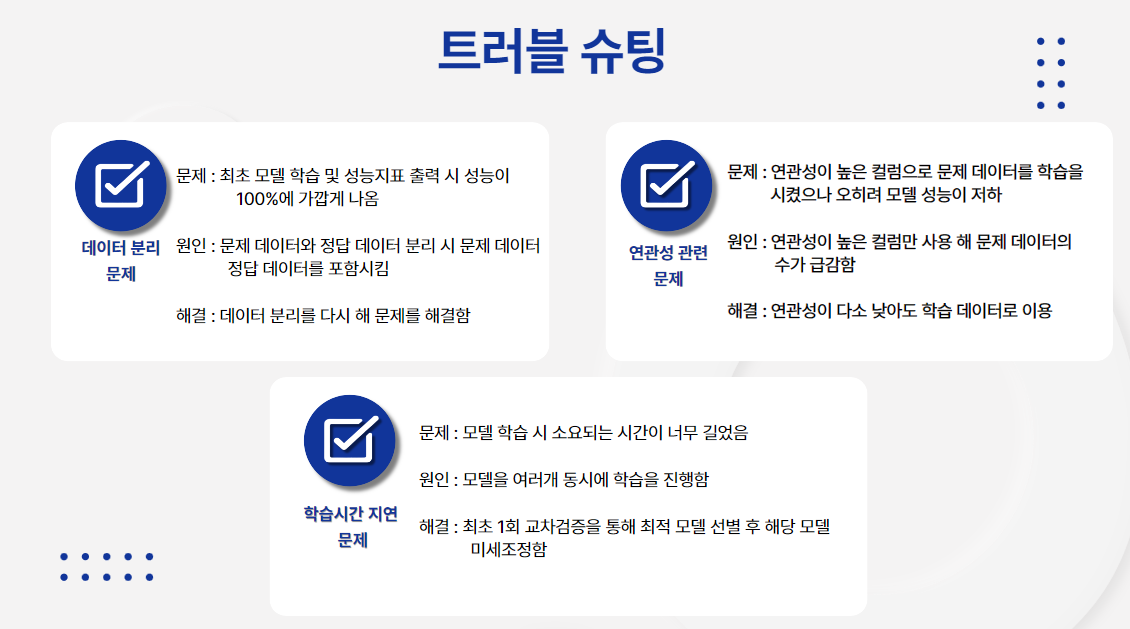

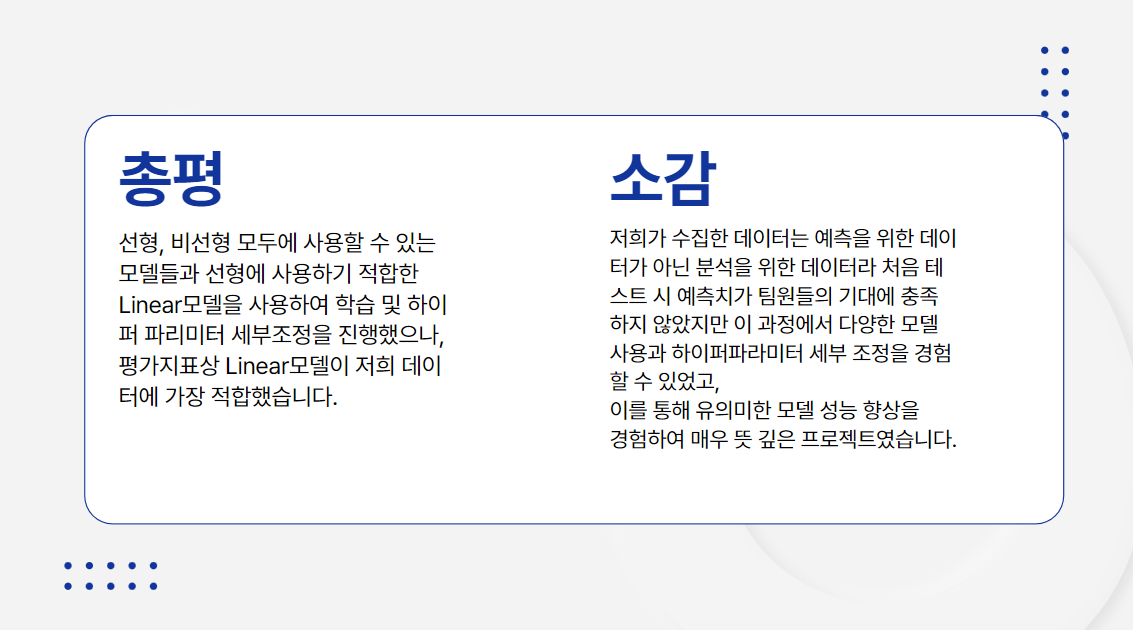

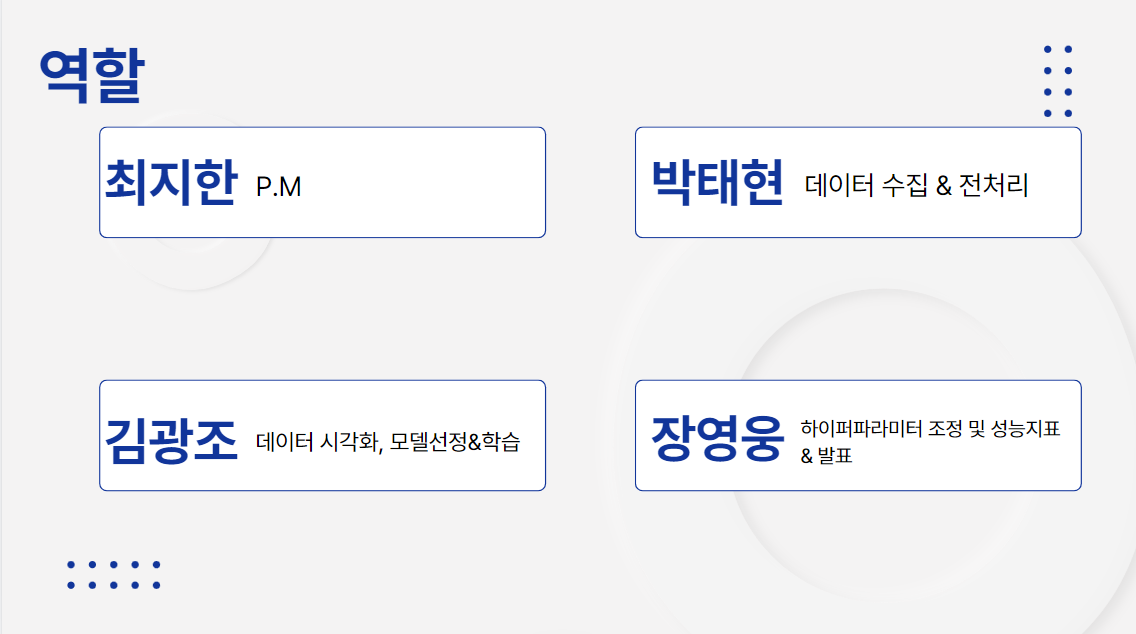